# Data visualization: beyond a simple bar graph

In this notebook we are going to analyse four visualizations applied on the same dataset 

### Import

In [1]:
import plotly.graph_objects as go
import plotly
import numpy as np
import plotly.figure_factory as ff

### Data
We are going to use data about the availability of car-sharing services near the centroid of a zone in Montreal
([more details here](https://plotly.com/python-api-reference/generated/plotly.data.html#plotly.data.carshare))

In [2]:
df = plotly.data.carshare()
df.head()

centroid_lat  centroid_lon    car_hours  peak_hour
0     45.471549    -73.588684  1772.750000          2
1     45.543865    -73.562456   986.333333         23
2     45.487640    -73.642767   354.750000         20
3     45.522870    -73.595677   560.166667         23
4     45.453971    -73.738946  2836.666667         19

Total car hours and total amount of sites aggregated by peak hours

In [3]:
peaks = df.groupby(by=['peak_hour']).sum()
peaks_loc = df.groupby(by=['peak_hour']).count()

### Design

We start by defining the global design styles applied on all the graphics, which will be overwritten locally if needed

In [4]:
#[EV] Reduce the code. All the repeated part should go into one variable
# axis = dict(...)

layout = go.Layout(
    paper_bgcolor="white", plot_bgcolor="white",
    font=dict(color="black", family="Roboto"),

    xaxis = dict(
        ticklen=10, ticks="outside", tickcolor="white", # simple workaround to move labels from the ticks
        zeroline=True, zerolinecolor="#000", zerolinewidth=1, # zeroline
        gridcolor="#BBB", gridwidth=0.5, griddash='dot', showgrid=True, # grids
        layer="above traces", # axis and grid above traces
        showline=True, linewidth=2, linecolor='black', # baseline
        dtick=1
    ),

    yaxis = dict(
        ticklen=10, ticks="outside", tickcolor="white", # simple workaround to move labels from the ticks
        zeroline=True, zerolinecolor="#000", zerolinewidth=1, # zeroline
        gridcolor="#BBB", gridwidth=0.5, griddash='dot', showgrid=True, # grids
        layer="above traces", # axis and grid above traces
        showline=True, linewidth=2, linecolor='black', # baseline
    ),

    polar=dict(
        angularaxis=dict(
            ticklen=10, ticks="outside", tickcolor="rgba(0, 0, 0, 0)",
            gridcolor="#BBB", gridwidth=0.5, griddash='dot', showgrid=True,
            layer="above traces", # axis and grid above traces
            showline=True, linewidth=2, linecolor='black', # baseline
        ),

        radialaxis=dict(
            ticklen=10, ticks="outside", tickcolor="rgba(0, 0, 0, 0)",
            gridcolor="#BBB", gridwidth=0.5, griddash='dot', showgrid=True,
            layer="above traces", # axis and grid above traces
            showline=True, linewidth=2, linecolor='black', # baseline
        ),
        bgcolor="white",
    ),

    margin={"r":60,"t":60,"l":60,"b":60}
)

marker = dict(
    color='black'
)

### Visualization
Simple bar graph

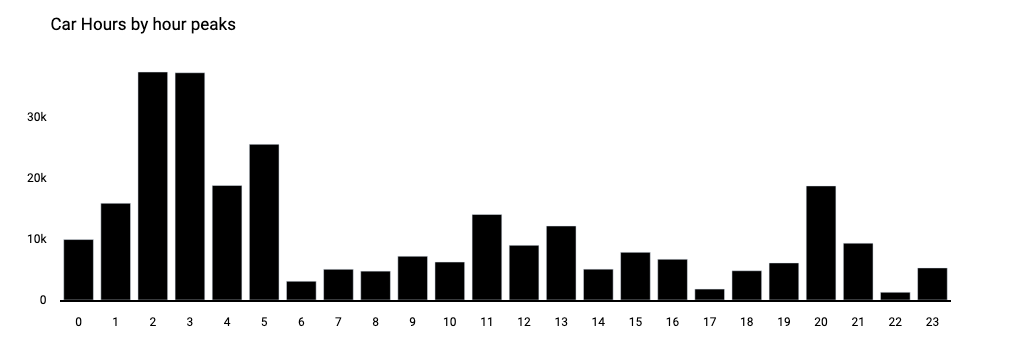

In [5]:
barGraph = go.Figure()
barGraph.add_trace(go.Bar(
    x=peaks.index,
    y=peaks['car_hours'],
    marker=marker
))

barGraph.update_layout(layout)

#[EV] add title
barGraph.update_layout(
    title="Car Hours by hour peaks",
)

#[EV] Disable grids
barGraph.update_xaxes(
    showgrid=False,
    zeroline=False,
)

barGraph.update_yaxes(
    showgrid=False,
    zeroline=False,
    showline=False
)

barGraph.show()

Simple area chart (time-series)

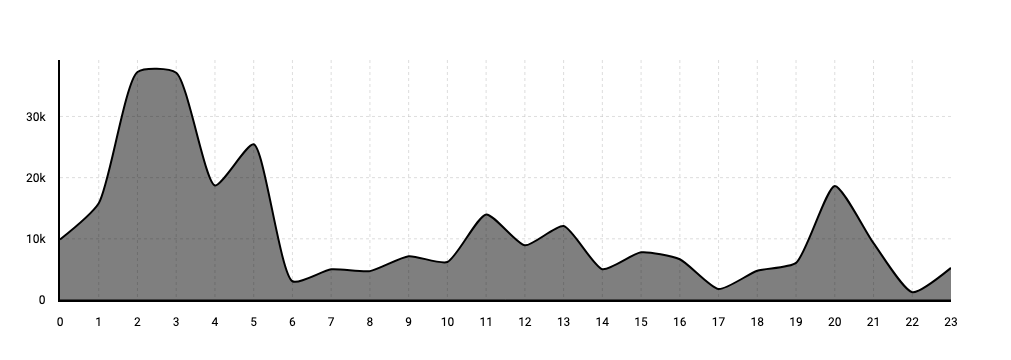

In [6]:
lineGraph = go.Figure()
lineGraph.add_trace(go.Scatter(
    x=peaks.index,
    y=peaks['car_hours'],
    mode='lines',
    fill='tozeroy',
    marker=marker,
    line_shape='spline',
    line_smoothing=0.6
))

lineGraph.update_layout(layout)
#[EV] Work grids here

lineGraph.show()


Radial area chart

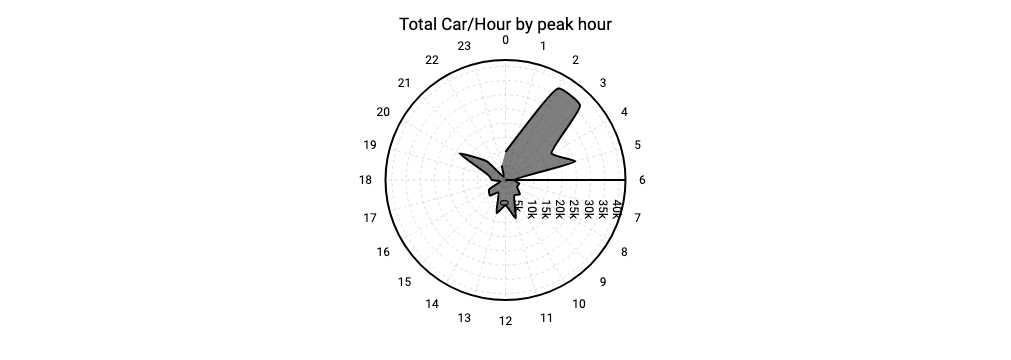

In [7]:
polarLine = go.Figure()
polarLine.add_trace(go.Scatterpolar(
    theta=peaks.index,
    r=peaks['car_hours'],
    text=peaks.index,
    mode='lines',
    fill='toself',
    marker=marker,
    line_shape='spline',
    line_smoothing=0.5
))

polarLine.update_layout(layout)

#[EV] Work grids here
polarLine.update_layout(
    title=dict(
        text="Total Car/Hour by peak hour",
        x=0.5,
        xanchor='center'
    ),
    polar=dict(
        angularaxis=dict(
            direction='clockwise',
            type='category',
        ),
        radialaxis_range=[0, peaks['car_hours'].max()+5000]
    )
)

polarLine.show()

Bubble map (a.k.a proportional symbol map)

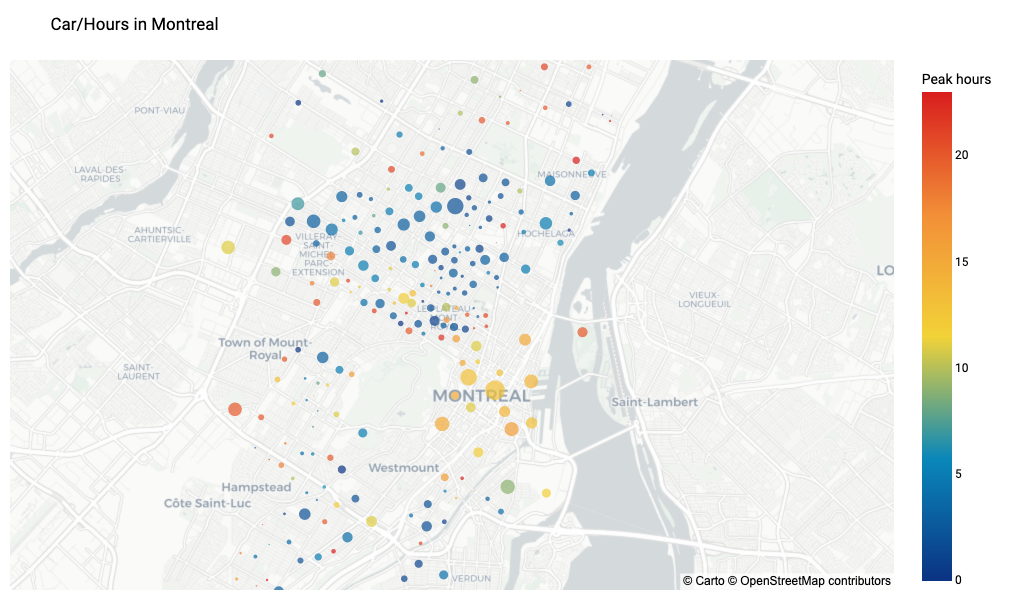

In [8]:
bubbleMap = go.Figure()

bubbleMap.add_trace(go.Scattermapbox(
    lat=df['centroid_lat'], lon=df['centroid_lon'], 
    mode='markers',
    marker=dict(
        size = (df['car_hours']/df['car_hours'].max()*20), # scale the data
        color = df['peak_hour'],
        #colorscale=plotly.colors.sequential.Inferno,
        colorscale=plotly.colors.diverging.Portland,
        colorbar=dict(
            title='Peak hours'
        )
    ),
    
    ))

mapLayout = dict(
    title='Car/Hours in Montreal',
    mapbox_style='carto-positron',
    mapbox_zoom=11,
    mapbox_center = {"lat": 45.52, "lon": -73.58},
    margin=dict(
        l=10,r=10,b=10
    ),
    height=600
)

bubbleMap.update_layout(layout)
bubbleMap.update_layout(mapLayout)

bubbleMap.show()

Aggregate data on map using a hexagonal grid (a.k.a. hexagonal binning)

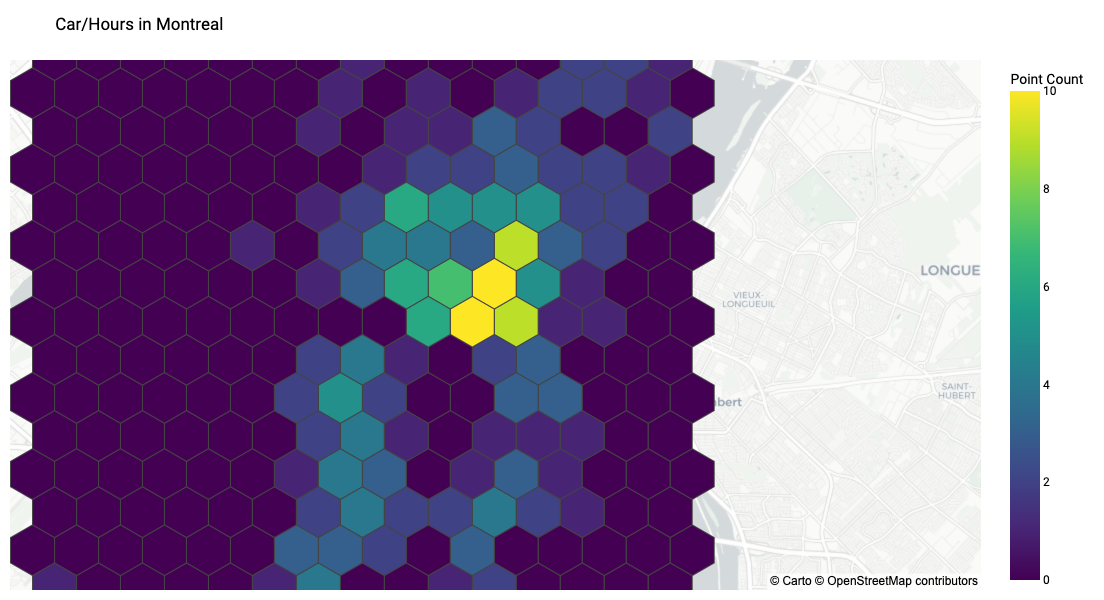

In [9]:
hexMap = ff.create_hexbin_mapbox(
    data_frame=df, lat="centroid_lat", lon="centroid_lon",
    nx_hexagon=15, labels={"color": "Point Count"},
    color_continuous_scale='viridis',
)

hexMap.update_layout(layout)
hexMap.update_layout(mapLayout)

hexMap.show()

Hexbin with min count, opacity, and showing underlying data

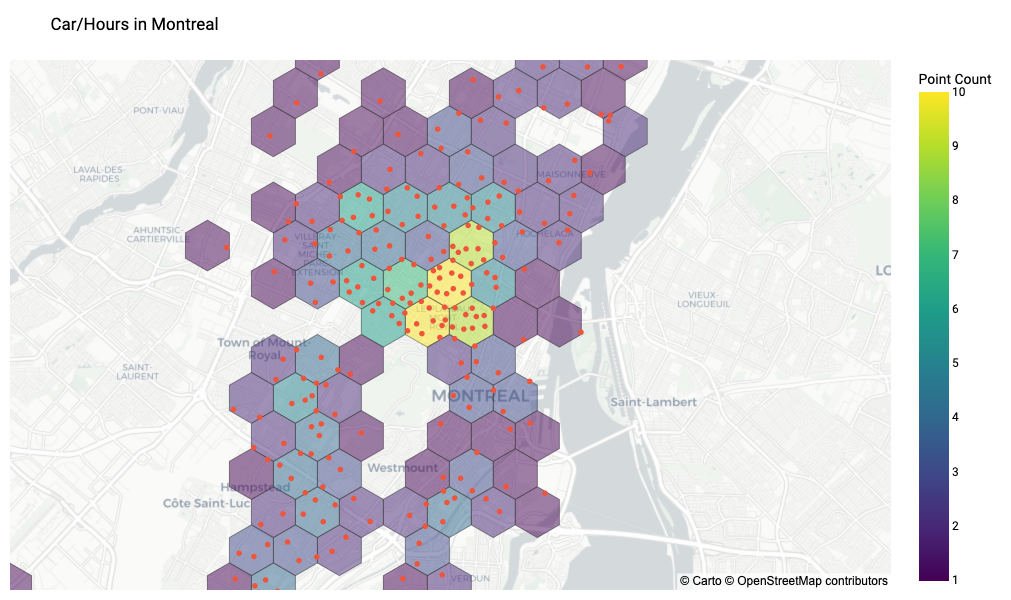

In [10]:
hexMap = ff.create_hexbin_mapbox(
    data_frame=df, lat="centroid_lat", lon="centroid_lon",
    nx_hexagon=15, labels={"color": "Point Count"},
    color_continuous_scale='viridis',
    show_original_data=True,
    opacity=0.5,
    min_count=1,
)

hexMap.update_layout(layout)
hexMap.update_layout(mapLayout)

hexMap.show()


Show average peak hour per hexbin

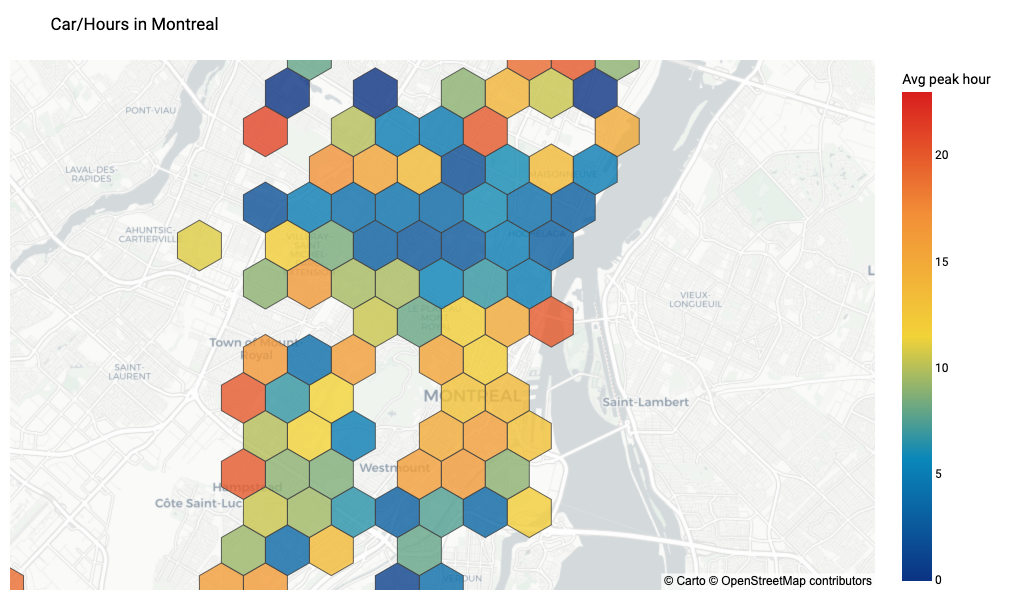

In [11]:
hexMap = ff.create_hexbin_mapbox(
    data_frame=df, lat="centroid_lat", lon="centroid_lon",
    nx_hexagon=15, labels={"color": "Avg peak hour"},
    color_continuous_scale='Portland', color="peak_hour", agg_func=np.mean,
    range_color=[0,23],
    opacity=0.8,
    min_count=1,
)

hexMap.update_layout(layout)
hexMap.update_layout(mapLayout)

hexMap.show()

Show average peak hour per hexbin

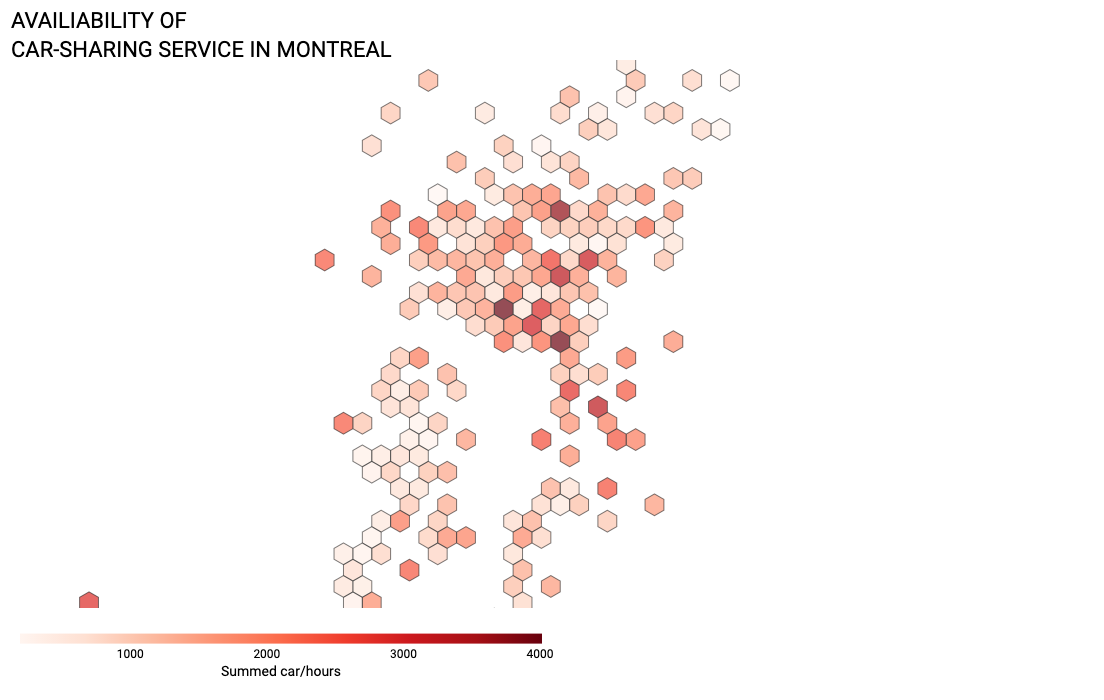

In [25]:
# https://plotly.com/python-api-reference/generated/plotly.figure_factory.create_hexbin_mapbox.html#plotly.figure_factory.create_hexbin_mapbox
hexMap = ff.create_hexbin_mapbox(
    data_frame=df, lat="centroid_lat", lon="centroid_lon",
    nx_hexagon=35, labels=dict(color="Summed car/hours"),
    color_continuous_scale='Reds', color="car_hours", agg_func=np.sum,
    opacity=0.7,
    min_count=1
)


hexMap.update_traces(
    colorbar=dict(
        title='abc',
        orientation='h'
    ),
)

hexMap.update_layout(layout)
hexMap.update_layout(mapLayout)
hexMap.update_layout(
    title=dict(
        text="AVAILIABILITY OF<br />CAR-SHARING SERVICE IN MONTREAL",
        x=0.01,
        y=0.96,
        font_size=22
    ),
    coloraxis=dict(
        colorbar=dict(
            x=0.0,
            y=-0.15,
            xanchor='left',
            orientation='h',
            titleside='bottom',
            len=0.5,
            thickness=10,
        )
    ),
    mapbox_style='white-bg',
    margin=dict(b=60),
    height=700
)

hexMap.show()